# **EDA Using R Programming**

### Name: PALAK NATH
### PRN: 17070124048


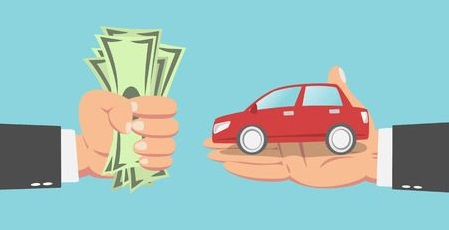

### **DATASET : USED CAR ADVERTISMENT** 

Dataset contains 9276 rows and 10 variables with essential meanings:

- car: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel (“Other” in this case should be treated as NA)
- registration: whether car registered in Ukraine or not
- year: year of production
- model: specific model name
- drive: drive type

In [1]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] fansi_0.4.2       digest_0.6.27     utf8_1.2.1        crayon_1.4.1     
 [5] IRdisplay_1.0     repr_1.1.3        lifecycle_1.0.0   jsonlite_1.7.2   
 [9] evaluate_0.14     pillar_1.5.1      rlang_0.4.10      uuid_0.1-4       
[13] ellipsis_0.3.1  

#### **INSTALLING LIBRARIES**

In [83]:
install.packages("gplots")
install.packages("scales")
install.packages("ggplot2")
install.packages("hrbrthemes")
library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
library(gplots)
library(ggplot2)
library(repr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gdtools’


Warning message in install.packages("hrbrthemes"):
“installation of package ‘gdtools’ had non-zero exit status”
Warning message in install.packages("hrbrthemes"):
“installation of package ‘hrbrthemes’ had non-zero exit status”


#### **IMPORTING DATASETS**

In [84]:
train <- read.csv("car_ad.csv")
head(train)

,car,price,body,mileage,engV,engType,registration,year,model,drive
,<chr>,<dbl>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>
1,GAZ,259.35,sedan,1,2.4,Other,yes,1959,21,rear
2,Moskvich-AZLK,280.00,sedan,99,1.5,Petrol,yes,1976,2140,rear
3,ZAZ,370.50,sedan,3,1.1,Petrol,yes,1989,968,rear
4,Moskvich-AZLK,400.00,sedan,1,10.0,Petrol,yes,1985,2140,rear
5,ZAZ,400.00,sedan,20,NA,Petrol,yes,1990,968,rear
6,VAZ,400.00,sedan,10,1.1,Petrol,yes,1982,2101,rear


#### **VARIABLE EXPLORATION**

In [85]:
## show all variable names
var_name <- names(train)
var_name

[1] "car"          "price"        "body"         "mileage"      "engV"        
 [6] "engType"      "registration" "year"         "model"        "drive"

In [86]:
sapply(train,class)

car        price         body      mileage         engV      engType 
 "character"    "numeric"  "character"    "integer"    "numeric"  "character" 
registration         year        model        drive 
 "character"    "integer"  "character"  "character"

#### **REMOVING NOT REQUIRED COLUMNS**

In [87]:
train = subset(train, select = -c(model) )
train

,car,price,body,mileage,engV,engType,registration,year,drive
,<chr>,<dbl>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>
1,GAZ,259.350,sedan,1,2.40,Other,yes,1959,rear
2,Moskvich-AZLK,280.000,sedan,99,1.50,Petrol,yes,1976,rear
3,ZAZ,370.500,sedan,3,1.10,Petrol,yes,1989,rear
4,Moskvich-AZLK,400.000,sedan,1,10.00,Petrol,yes,1985,rear
5,ZAZ,400.000,sedan,20,NA,Petrol,yes,1990,rear
6,VAZ,400.000,sedan,10,1.10,Petrol,yes,1982,rear
7,VAZ,460.000,sedan,1,NA,Petrol,yes,1981,rear
8,VAZ,463.125,sedan,10,1.30,Petrol,yes,1979,rear
9,VAZ,463.125,sedan,68,1.20,Petrol,yes,1984,rear


#### **STATISTICAL SUMMARY** 

In [88]:
summary(train)

     car                price              body              mileage     
 Length:9309        Min.   :   259.4   Length:9309        Min.   :  0.0  
 Class :character   1st Qu.:  5400.0   Class :character   1st Qu.: 71.0  
 Mode  :character   Median :  9500.0   Mode  :character   Median :129.0  
                    Mean   : 16081.7                      Mean   :140.3  
                    3rd Qu.: 17000.0                      3rd Qu.:195.0  
                    Max.   :547800.0                      Max.   :999.0  
                                                                         
      engV          engType          registration            year     
 Min.   : 0.100   Length:9309        Length:9309        Min.   :1953  
 1st Qu.: 1.600   Class :character   Class :character   1st Qu.:2004  
 Median : 2.000   Mode  :character   Mode  :character   Median :2008  
 Mean   : 2.629                                         Mean   :2007  
 3rd Qu.: 2.500                                      

#### **DATA CLEANING : FINDING MISSING DATA**

In [89]:
#Filling empty values with NA
train[train==""]<-NA

In [90]:
# As in Example one, you can create a data frame with logical TRUE and FALSE values; 
# Indicating observed and missing values
is.na(train)
apply(is.na(train), 2, which)

,car,price,body,mileage,engV,engType,registration,year,drive
1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
5,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
6,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
7,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
8,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
9,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
10,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


$car
named integer(0)

$price
named integer(0)

$body
named integer(0)

$mileage
named integer(0)

$engV
   5    7   22   39   99  113  122  269  277  304  327  329  397  443  506  523 
   5    7   22   39   99  113  122  269  277  304  327  329  397  443  506  523 
 531  545  577  596  613  627  654  656  778  780  807  815  842  859  893  930 
 531  545  577  596  613  627  654  656  778  780  807  815  842  859  893  930 
 943  955  976  990 1026 1079 1144 1151 1185 1196 1215 1216 1242 1259 1302 1310 
 943  955  976  990 1026 1079 1144 1151 1185 1196 1215 1216 1242 1259 1302 1310 
1314 1316 1317 1318 1336 1338 1346 1352 1356 1358 1361 1370 1376 1377 1380 1382 
1314 1316 1317 1318 1336 1338 1346 1352 1356 1358 1361 1370 1376 1377 1380 1382 
1389 1400 1401 1413 1440 1446 1463 1482 1499 1503 1567 1573 1576 1599 1630 1671 
1389 1400 1401 1413 1440 1446 1463 1482 1499 1503 1567 1573 1576 1599 1630 1671 
1707 1771 1775 1800 1863 1911 1934 1979 2040 2073 2097 2109 2123 2138 2167 2193 
1707 1771 1775 1800 1863 1911 1934 1979 2040 2073 2097 2109 2123 2138 2167 2193 
2345 2349 2359 2376 2425 2488 2492 2545 2560 2684 2857 2891 2923 3029 3158 3175 
2345 2349 2359 2376 2425 2488 2492 2545 2560 2684 2857 2891 2923 3029 3158 3175 
3278 3386 3583 3676 3712 3720 3724 3733 3736 3737 3765 3766 3771 3778 3782 3783 
3278 3386 3583 3676 3712 3720 3724 3733 3736 3737 3765 3766 3771 3778 3782 3783 
3786 3788 3792 3806 3822 3851 3858 3870 3879 3893 3911 3941 3979 3983 3989 4085 
3786 3788 3792 3806 3822 3851 3858 3870 3879 3893 3911 3941 3979 3983 3989 4085 
4133 4175 4221 4235 4302 4327 4334 4343 4352 4355 4357 4379 4384 4400 4402 4492 
4133 4175 4221 4235 4302 4327 4334 4343 4352 4355 4357 4379 4384 4400 4402 4492 
4505 4517 4541 4547 4580 4596 4609 4630 4638 4642 4691 4715 4729 4736 4751 4755 
4505 4517 4541 4547 4580 4596 4609 4630 4638 4642 4691 4715 4729 4736 4751 4755 
4762 4828 4837 4838 4865 4961 4971 5051 5256 5259 5277 5363 5389 5397 5410 5422 
4762 4828 4837 4838 4865 4961 4971 5051 5256 5259 5277 5363 5389 5397 5410 5422 
5536 5556 5575 5600 5649 5654 5657 5672 5703 5725 5728 5732 5736 5766 5818 5819 
5536 5556 5575 5600 5649 5654 5657 5672 5703 5725 5728 5732 5736 5766 5818 5819 
5820 5874 5915 5955 5956 6065 6182 6212 6242 6296 6318 6393 6407 6423 6425 6490 
5820 5874 5915 5955 5956 6065 6182 6212 6242 6296 6318 6393 6407 6423 6425 6490 
6513 6514 6523 6563 6573 6591 6759 6786 6794 6807 6870 6871 6988 7139 7164 7200 
6513 6514 6523 6563 6573 6591 6759 6786 6794 6807 6870 6871 6988 7139 7164 7200 
7253 7340 7376 7386 7499 7529 7600 7642 7649 7651 7697 7741 7789 7797 7875 7891 
7253 7340 7376 7386 7499 7529 7600 7642 7649 7651 7697 7741 7789 7797 7875 7891 
7940 7962 7969 7971 8008 8033 8043 8044 8047 8060 8070 8145 8150 8174 8177 8181 
7940 7962 7969 7971 8008 8033 8043 8044 8047 8060 8070 8145 8150 8174 8177 8181 
8183 8188 8193 8216 8217 8223 8228 8253 8262 8264 8266 8294 8297 8300 8305 8313 
8183 8188 8193 8216 8217 8223 8228 8253 8262 8264 8266 8294 8297 8300 8305 8313 
8322 8334 8337 8343 8352 8354 8363 8371 8381 8382 8399 8402 8403 8408 8411 8413 
8322 8334 8337 8343 8352 8354 8363 8371 8381 8382 8399 8402 8403 8408 8411 8413 
8414 8416 8417 8432 8447 8448 8452 8462 8470 8478 8479 8487 8497 8517 8530 8531 
8414 8416 8417 8432 8447 8448 8452 8462 8470 8478 8479 8487 8497 8517 8530 8531 
8535 8552 8553 8556 8579 8601 8621 8678 8682 8724 8740 8788 8810 8831 8850 8860 
8535 8552 8553 8556 8579 8601 8621 8678 8682 8724 8740 8788 8810 8831 8850 8860 
8886 8891 8893 8897 8898 8899 8901 8904 8905 8907 8908 8909 8912 8913 8914 8919 
8886 8891 8893 8897 8898 8899 8901 8904 8905 8907 8908 8909 8912 8913 8914 8919 
8922 8923 8927 8928 8929 8930 8935 8939 8942 8943 8957 8964 8968 8969 8974 8982 
8922 8923 8927 8928 8929 8930 8935 8939 8942 8943 8957 8964 8968 8969 8974 8982 
8991 8995 9000 9003 9004 9021 9028 9032 9035 9041 9045 9046 9049 9055 9060 9065 
8991 8995 9000 9003 9004 9021 9028 9032 9035 9041 9045 9046 9049 9055 9060 9065 
9067 90

#### **HANDLING MISSING DATA**
Missing Data is only in the column, engV so replacing the NA values using mean

In [91]:
#Replacing Values with mean in engV
train$engV[is.na(train$engV)]<-mean(train$engV,na.rm=TRUE)

In [92]:
#Removing rows with NA in drive Column
train <- na.omit(train)  # remove na in r - remove rows - na.omit function / option

#### **CHECK FOR NA VALUES AGAIN**

In [93]:
apply(is.na(train), 2, which)
#will not show anything as no NA Value present now

integer(0)

#### **VISUALISATION**

HISTOGRAM

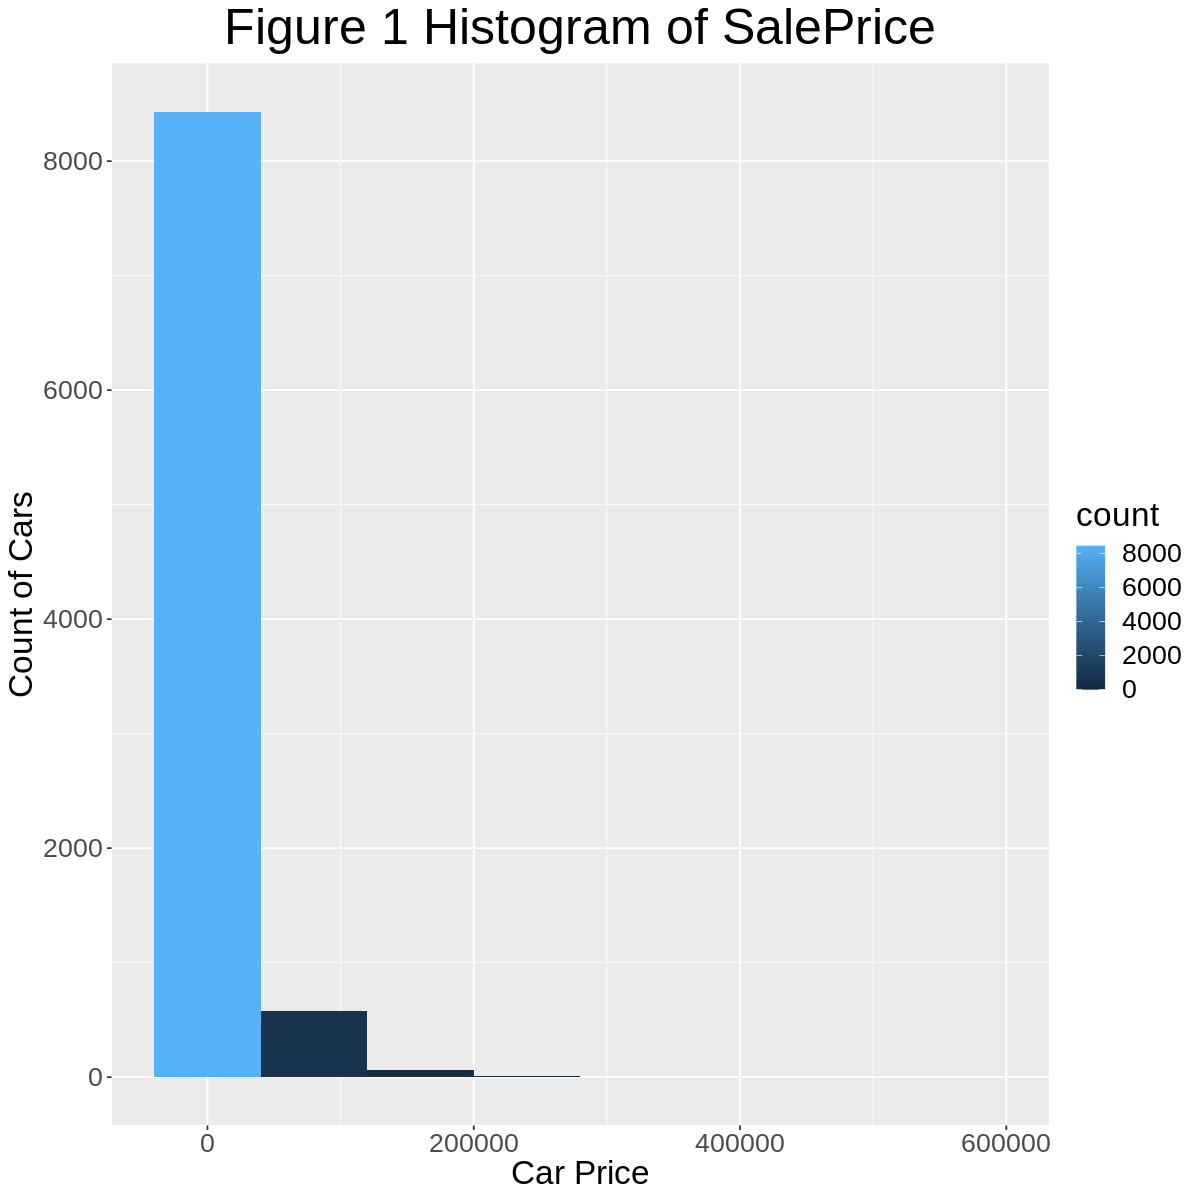

In [94]:
# Draw a higtogram to figure out the distribution of SalePrice
options(scipen=500)
options(repr.plot.width=10, repr.plot.height=10)
ggplot(train, aes(x = price, fill = ..count..)) +
  geom_histogram(binwidth = 80000) +
  ggtitle("Figure 1 Histogram of SalePrice") +
  ylab("Count of Cars") +
  xlab("Car Price") + 
  theme(text = element_text(size = 20)) +  
  theme(plot.title = element_text(hjust = 0.5, size = 30)) 

BAR CHART

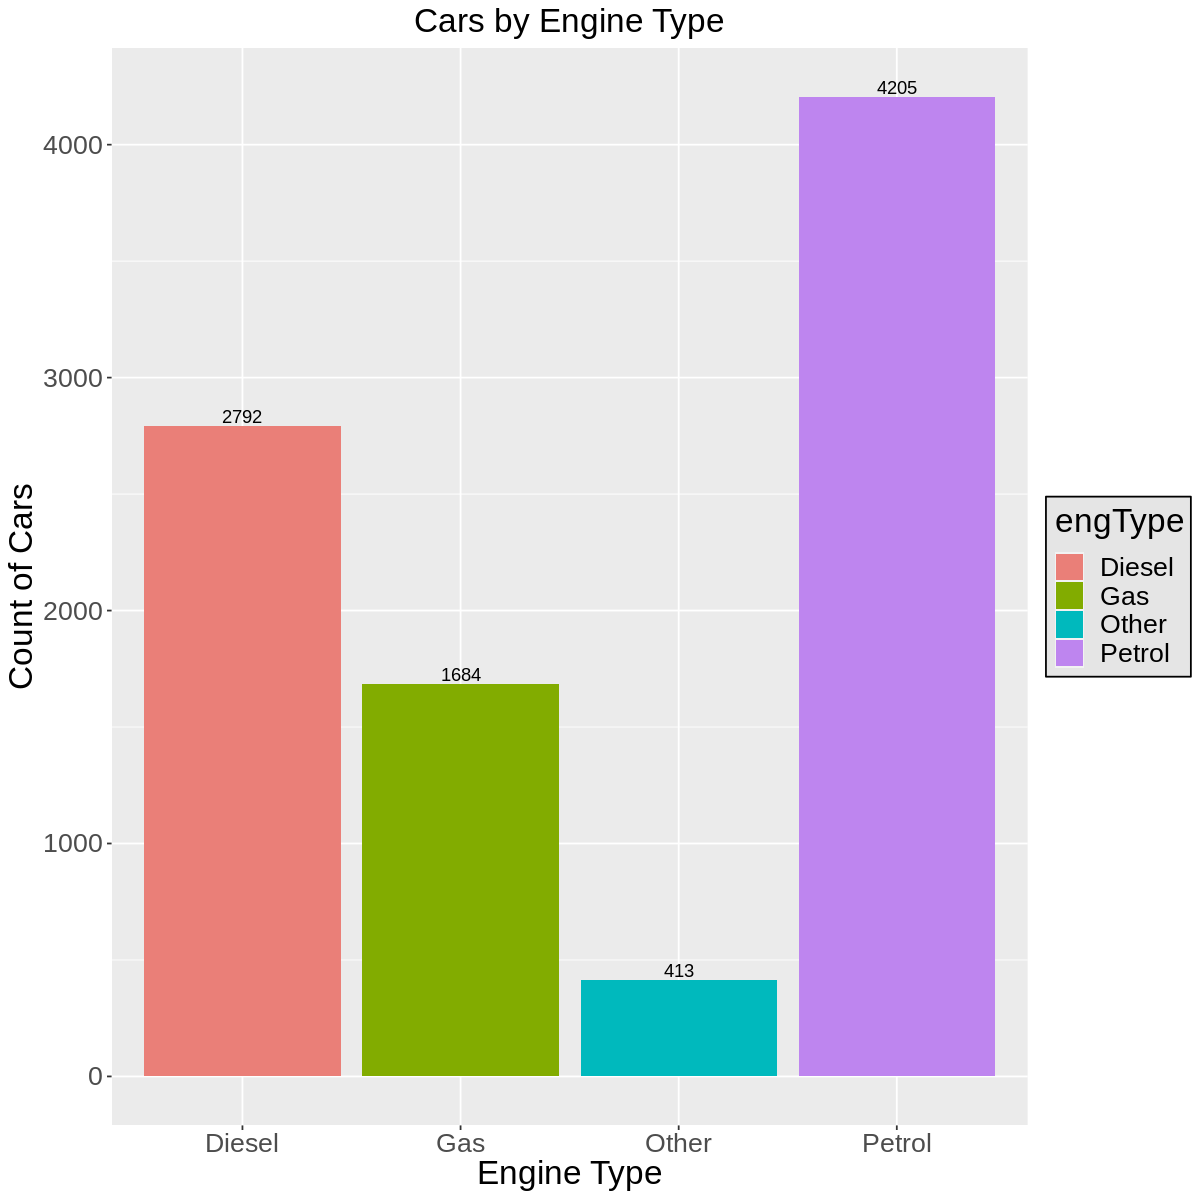

In [95]:
#Cars by Engine Type
options(repr.plot.width=10, repr.plot.height=10)
bp1 <- ggplot(train, aes(x = engType, fill = engType )) + 
geom_bar()+ 
scale_fill_hue(c = 80)+
ggtitle("Cars by Engine Type")+
  ylab("Count of Cars") +
  xlab("Engine Type") + 
theme(plot.title = element_text(hjust = 0.5, size=20),legend.position="right", legend.background = element_rect(fill="grey90",
                                                                                                           size=0.5, linetype="solid", 
                                                                                                           colour ="black"))+
geom_text(stat='count',aes(label=..count..),vjust=-0.25)+ 
  theme(text = element_text(size = 20)) 
bp1

PIE CHART

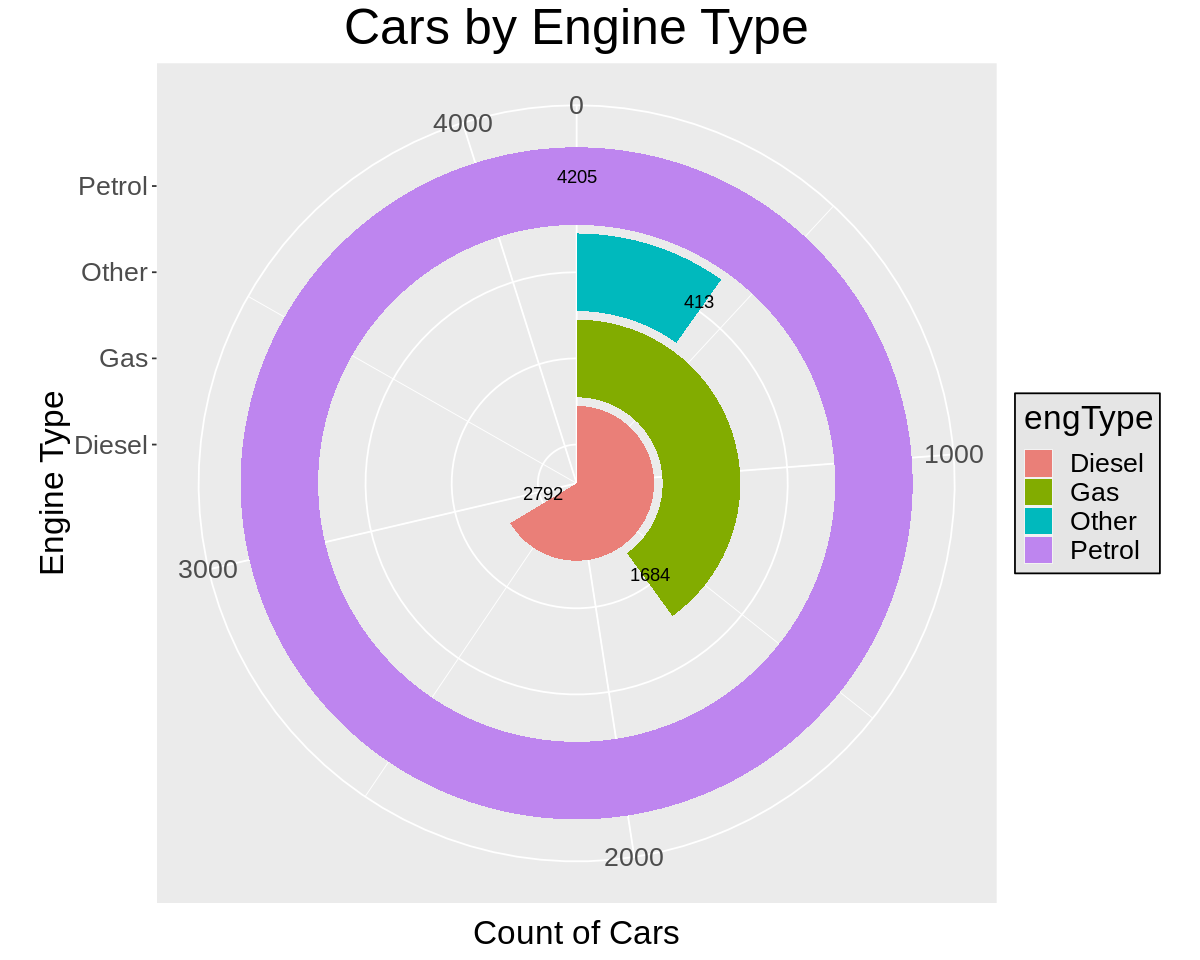

In [96]:
options(repr.plot.width=10, repr.plot.height=8)
pie <- bp1 + coord_polar("y")+ 
theme(text = element_text(size = 20)) +  
theme(plot.title = element_text(hjust = 0.5, size = 30)) 
pie

HORIZONTAL BAR CHART

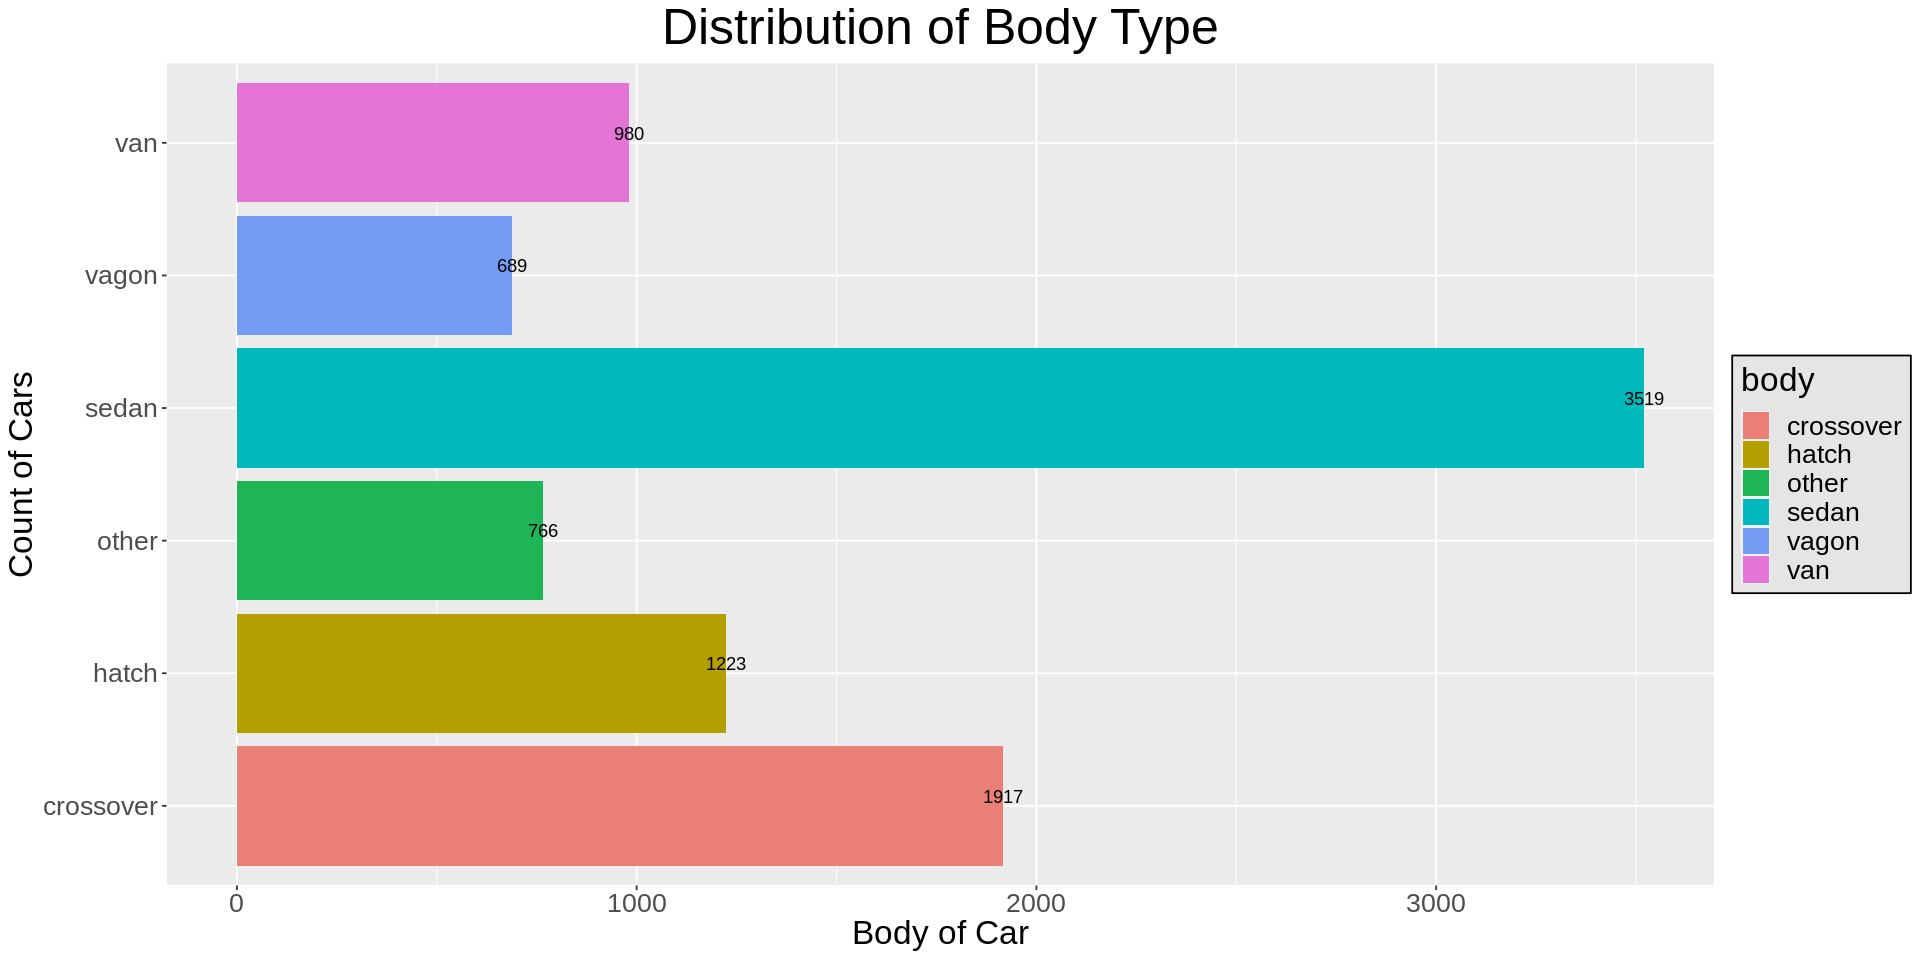

In [97]:
# count car by body
options(repr.plot.width=16, repr.plot.height=8)
bp <- ggplot(train, aes(x = body, fill = body )) + 
geom_bar()+ 
scale_fill_hue(c = 80)+
ggtitle("Distribution of Body Type")+
ylab("Body of Car") +
xlab("Count of Cars") + 
theme(text = element_text(size = 20)) +  
theme(plot.title = element_text(hjust = 0.5,size = 30),legend.position="right", legend.background = element_rect(fill="grey90",
                                                                                                           size=0.5, linetype="solid", 
                                                                                                           colour ="black"))+
geom_text(stat='count',aes(label=..count..),vjust=-0.25) +
coord_flip()
bp

In [98]:
# Distribution of body type
table(train$body)


crossover     hatch     other     sedan     vagon       van 
     1917      1223       766      3519       689       980 

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



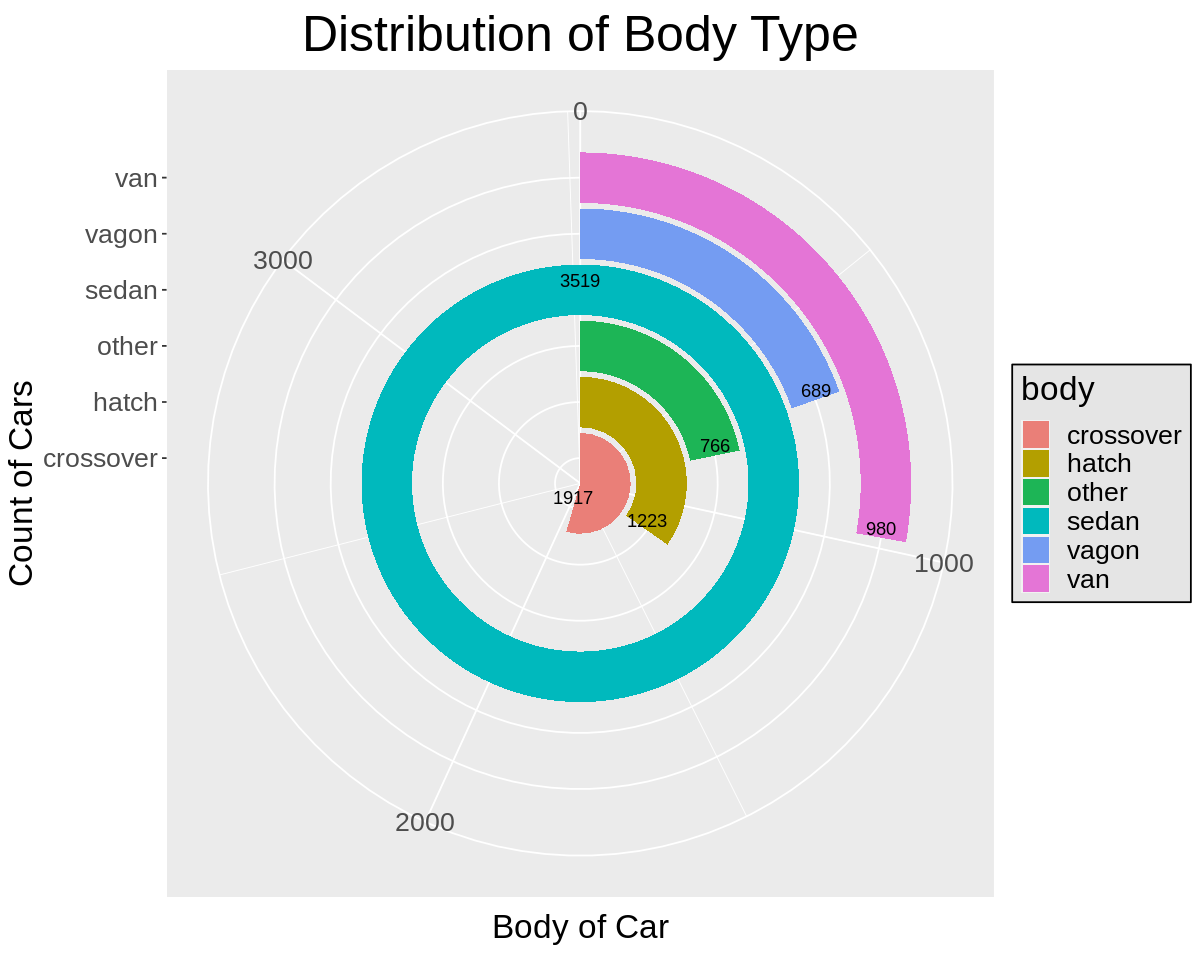

In [99]:
options(repr.plot.width=10, repr.plot.height=8)
pie <- bp + coord_polar("y", start=0) 
pie

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


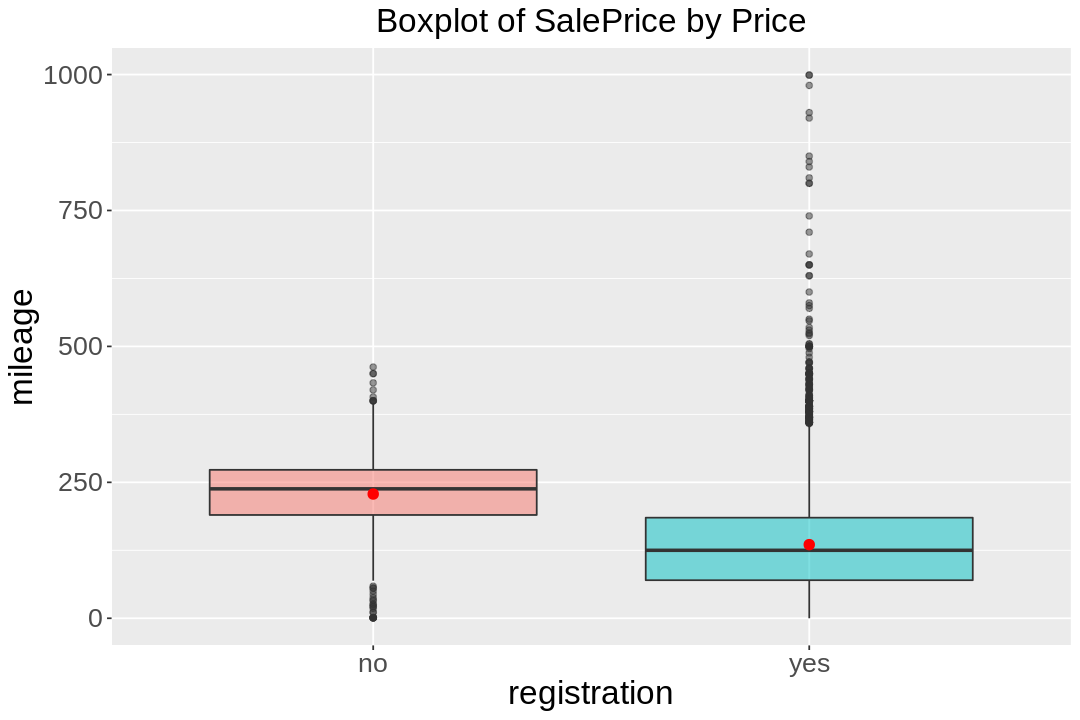

In [100]:
# Change plot size to 9 x 6
options(repr.plot.width=9, repr.plot.height=6)
#boxplot of SalePrice by MSZoning
#add average value of SalePrice as red point
ggplot(train, aes(x=registration, y=mileage, fill=registration)) + 
  geom_boxplot(alpha=0.5) +  
  theme(text = element_text(size = 20)) +  
  theme(plot.title = element_text(hjust = 0.5, size = 30)) +
  stat_summary(fun.y=mean, geom="point", shape=20, size=4, color="red", fill="red")+
  theme(legend.position="none")+
  ggtitle("Boxplot of SalePrice by Price")+
  theme(plot.title = element_text(hjust = 0.5, size=20))

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


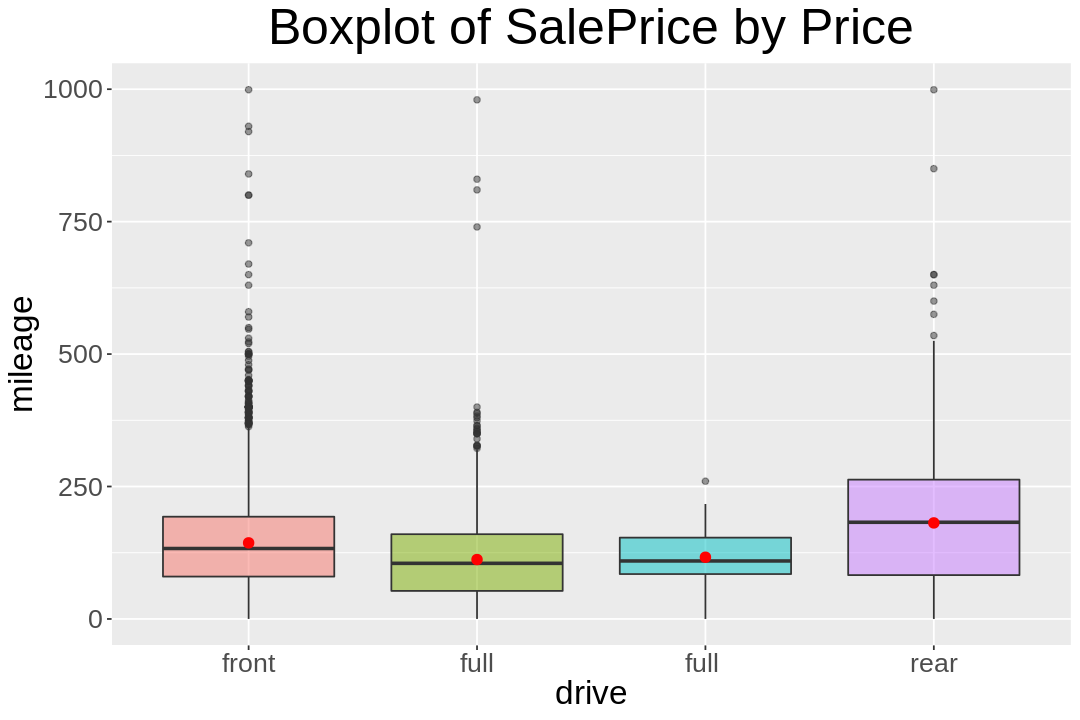

In [101]:
# Change plot size to 9 x 6
options(repr.plot.width=9, repr.plot.height=6)
#boxplot of Mileage by MSZoning
#add average value of Mileage as red point
ggplot(train, aes(x=drive, y=mileage, fill=drive)) + 
  theme(text = element_text(size = 20)) +  
  theme(plot.title = element_text(hjust = 0.5, size = 30)) +
  geom_boxplot(alpha=0.5) +
  stat_summary(fun.y=mean, geom="point", shape=20, size=4, color="red", fill="red")+
  theme(legend.position="none")+
  ggtitle("Boxplot of SalePrice by Price")+
  theme(plot.title = element_text(hjust = 0.5))

In [102]:
library(plyr)
ddply(train, .(drive), summarize,Total = length(drive),Max_price=max(price),Min_price=min(price))

ERROR: ignored

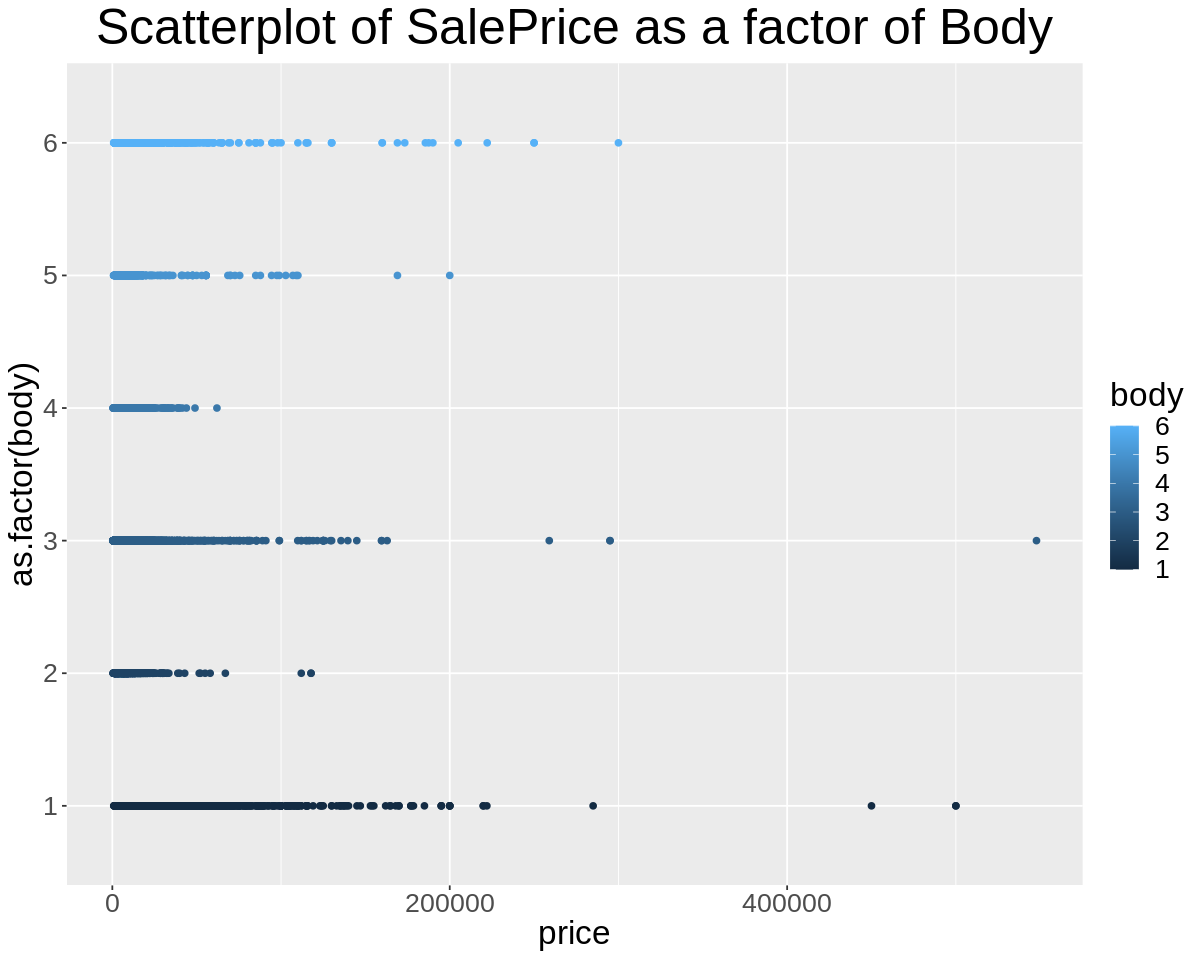

In [106]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(train, aes(price,as.factor(body), col= body)) + 
theme(text = element_text(size = 20)) +  
theme(plot.title = element_text(hjust = 0.5, size = 30)) +  
ggtitle("Scatterplot of SalePrice as a factor of Body")+
geom_point()

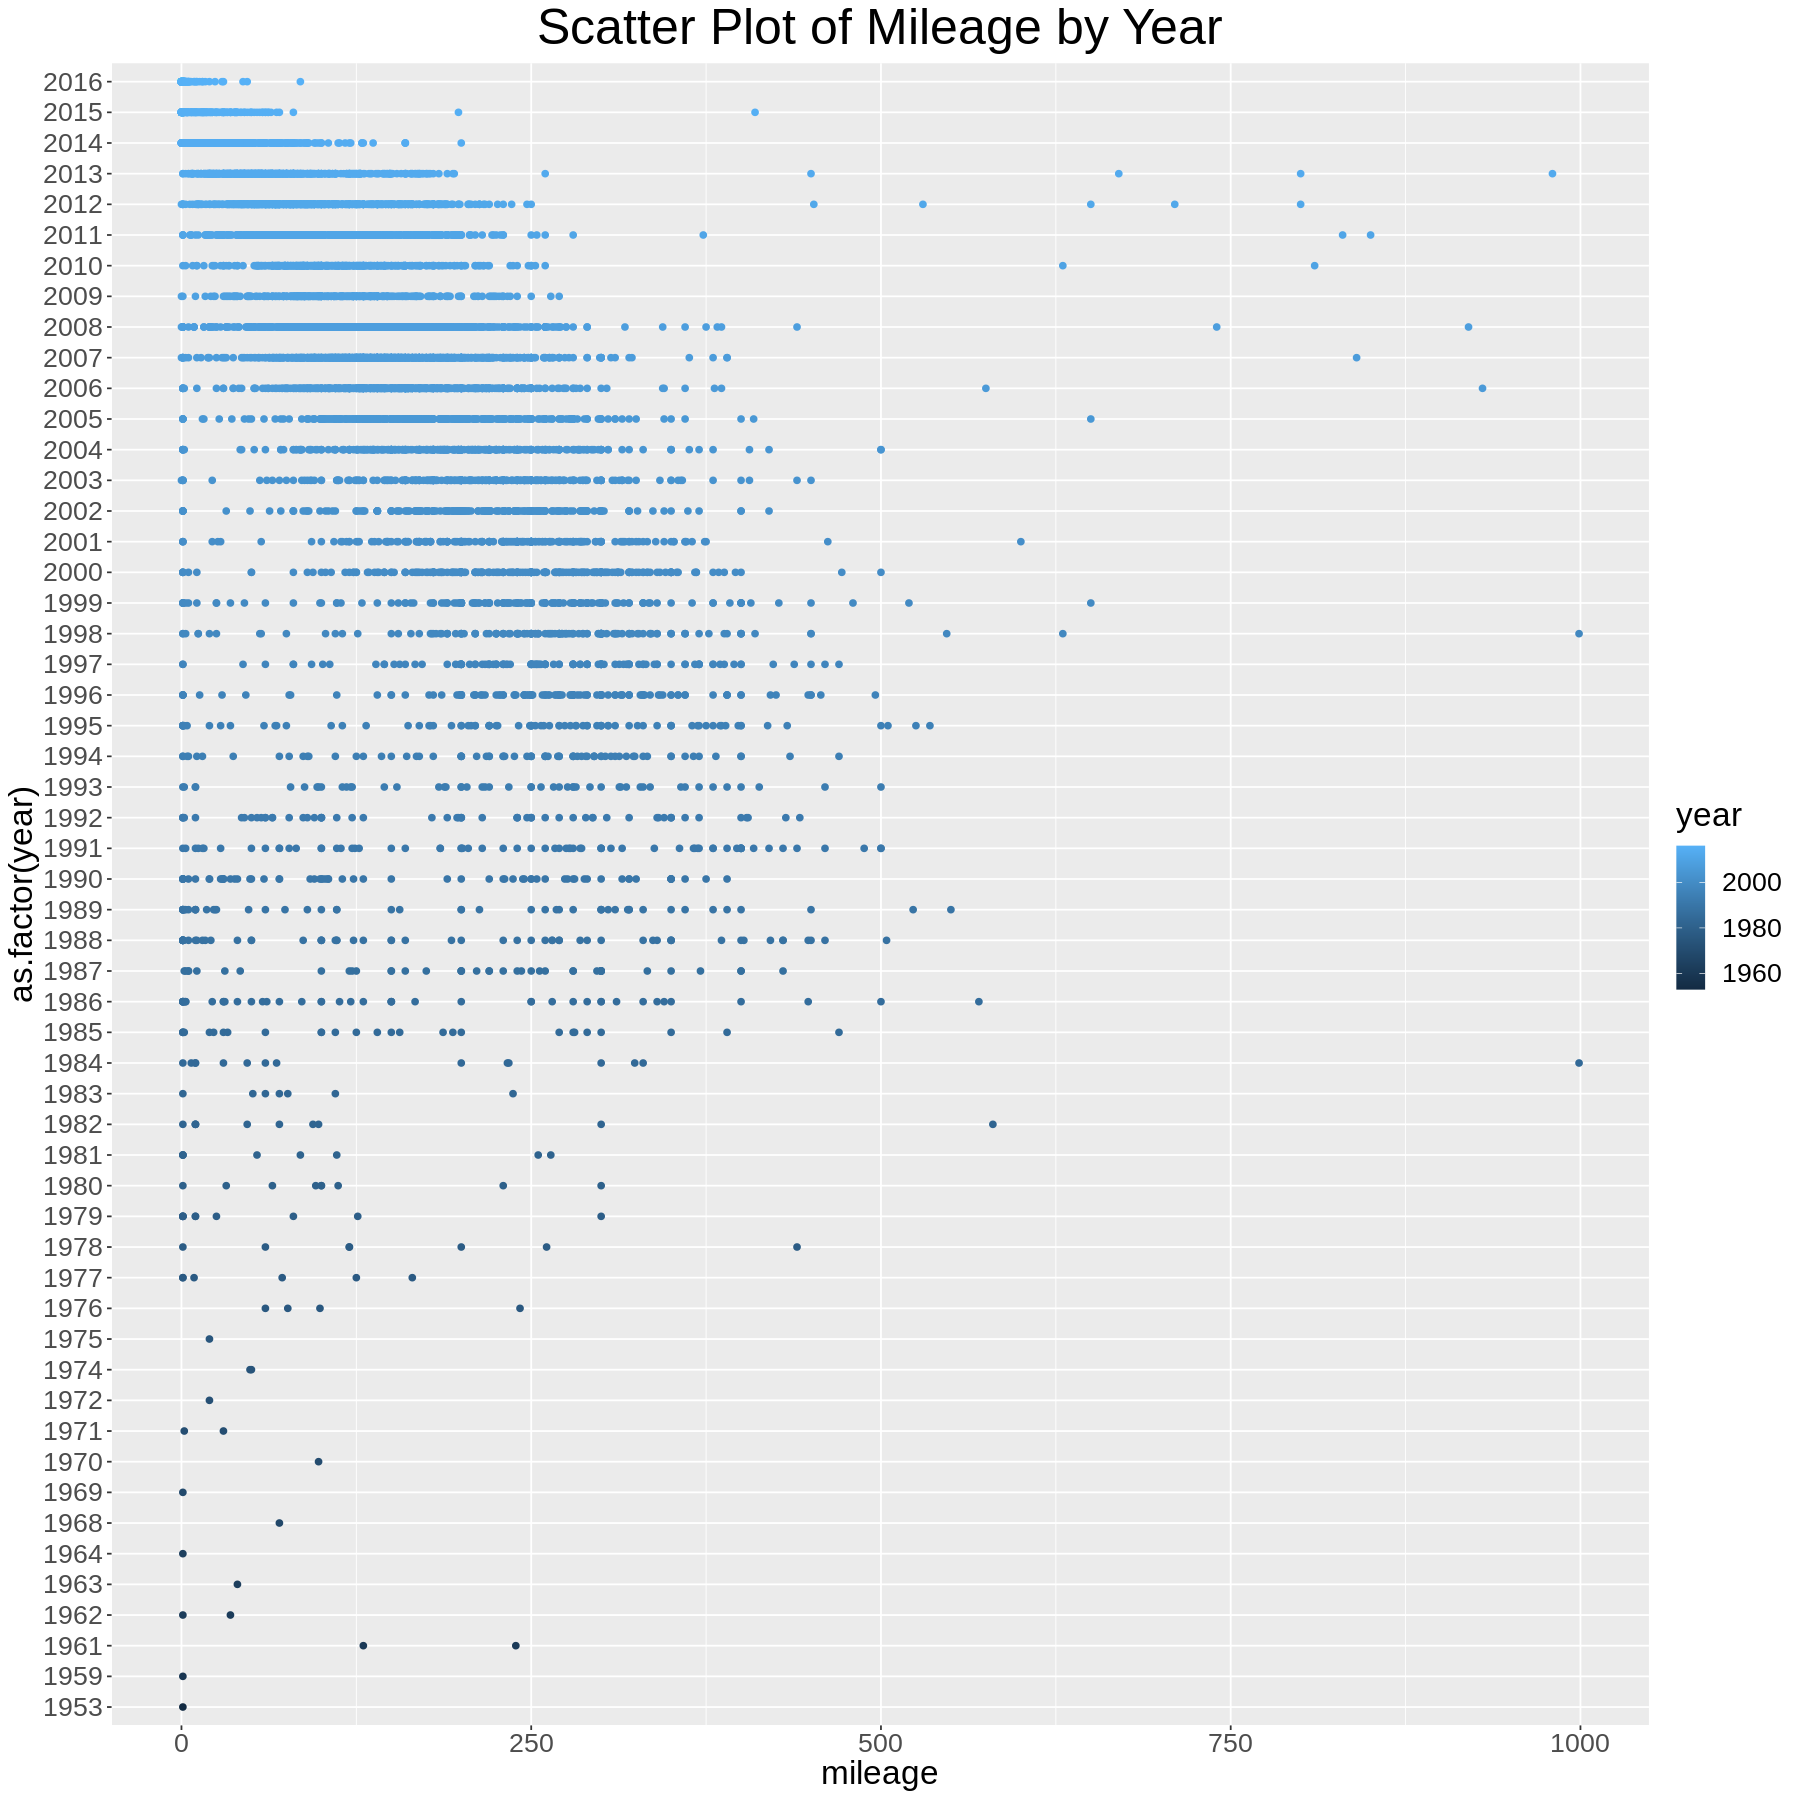

In [107]:
options(repr.plot.width=15, repr.plot.height=15)
ggplot(train, aes(mileage,as.factor(year), col= year)) +  
ggtitle("Scatter Plot of Mileage by Year")+ 
theme(text = element_text(size = 20)) +  
theme(plot.title = element_text(hjust = 0.5, size = 30)) +  
geom_point()

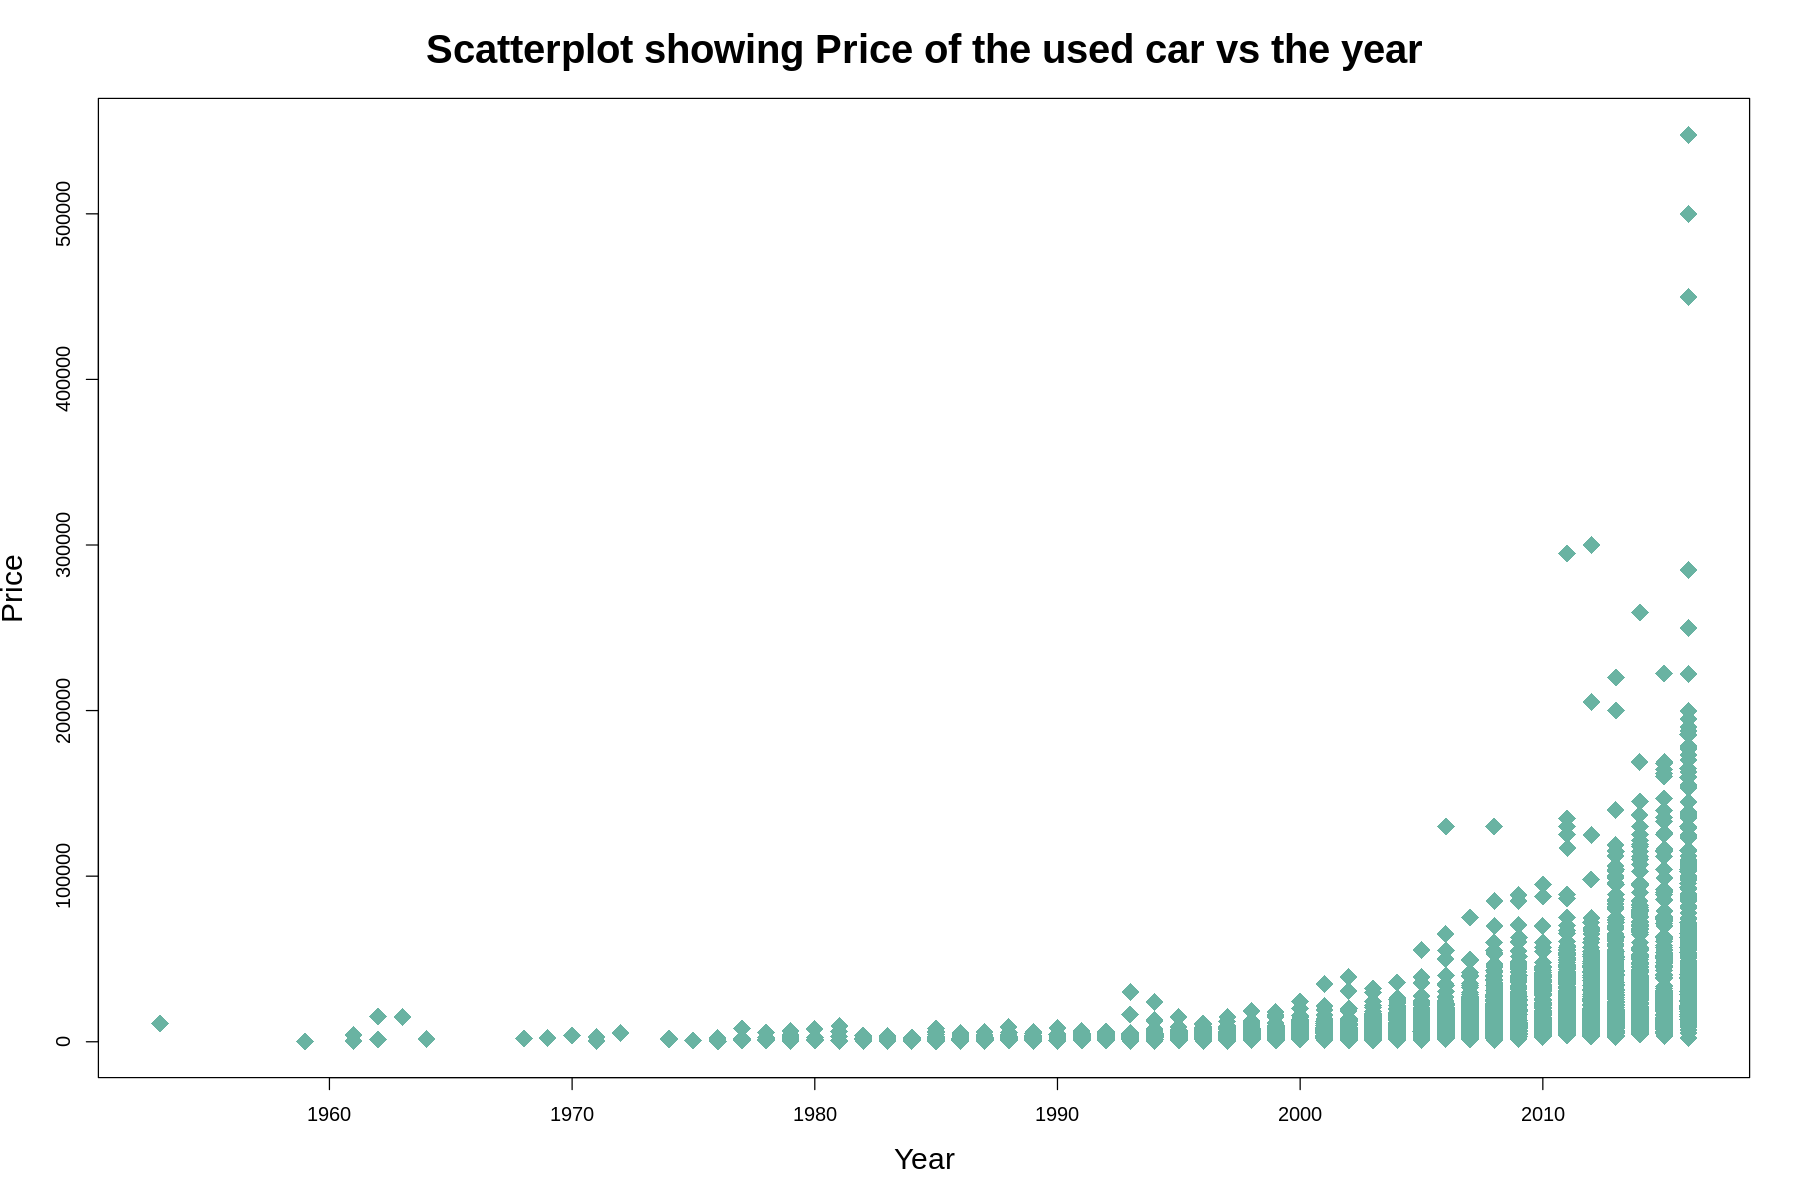

In [108]:
options(repr.plot.width=15, repr.plot.height=10)
plot(x=train$year, y=train$price, pch=18, 
     cex=2, 
     col="#69b3a2",
     cex.main=2,
     cex.lab = 1.5,
     cex.axis=1,
     xlab="Year", ylab="Price",
     main="Scatterplot showing Price of the used car vs the year") 


Warning message:
“Removed 16 rows containing missing values (geom_tile).”


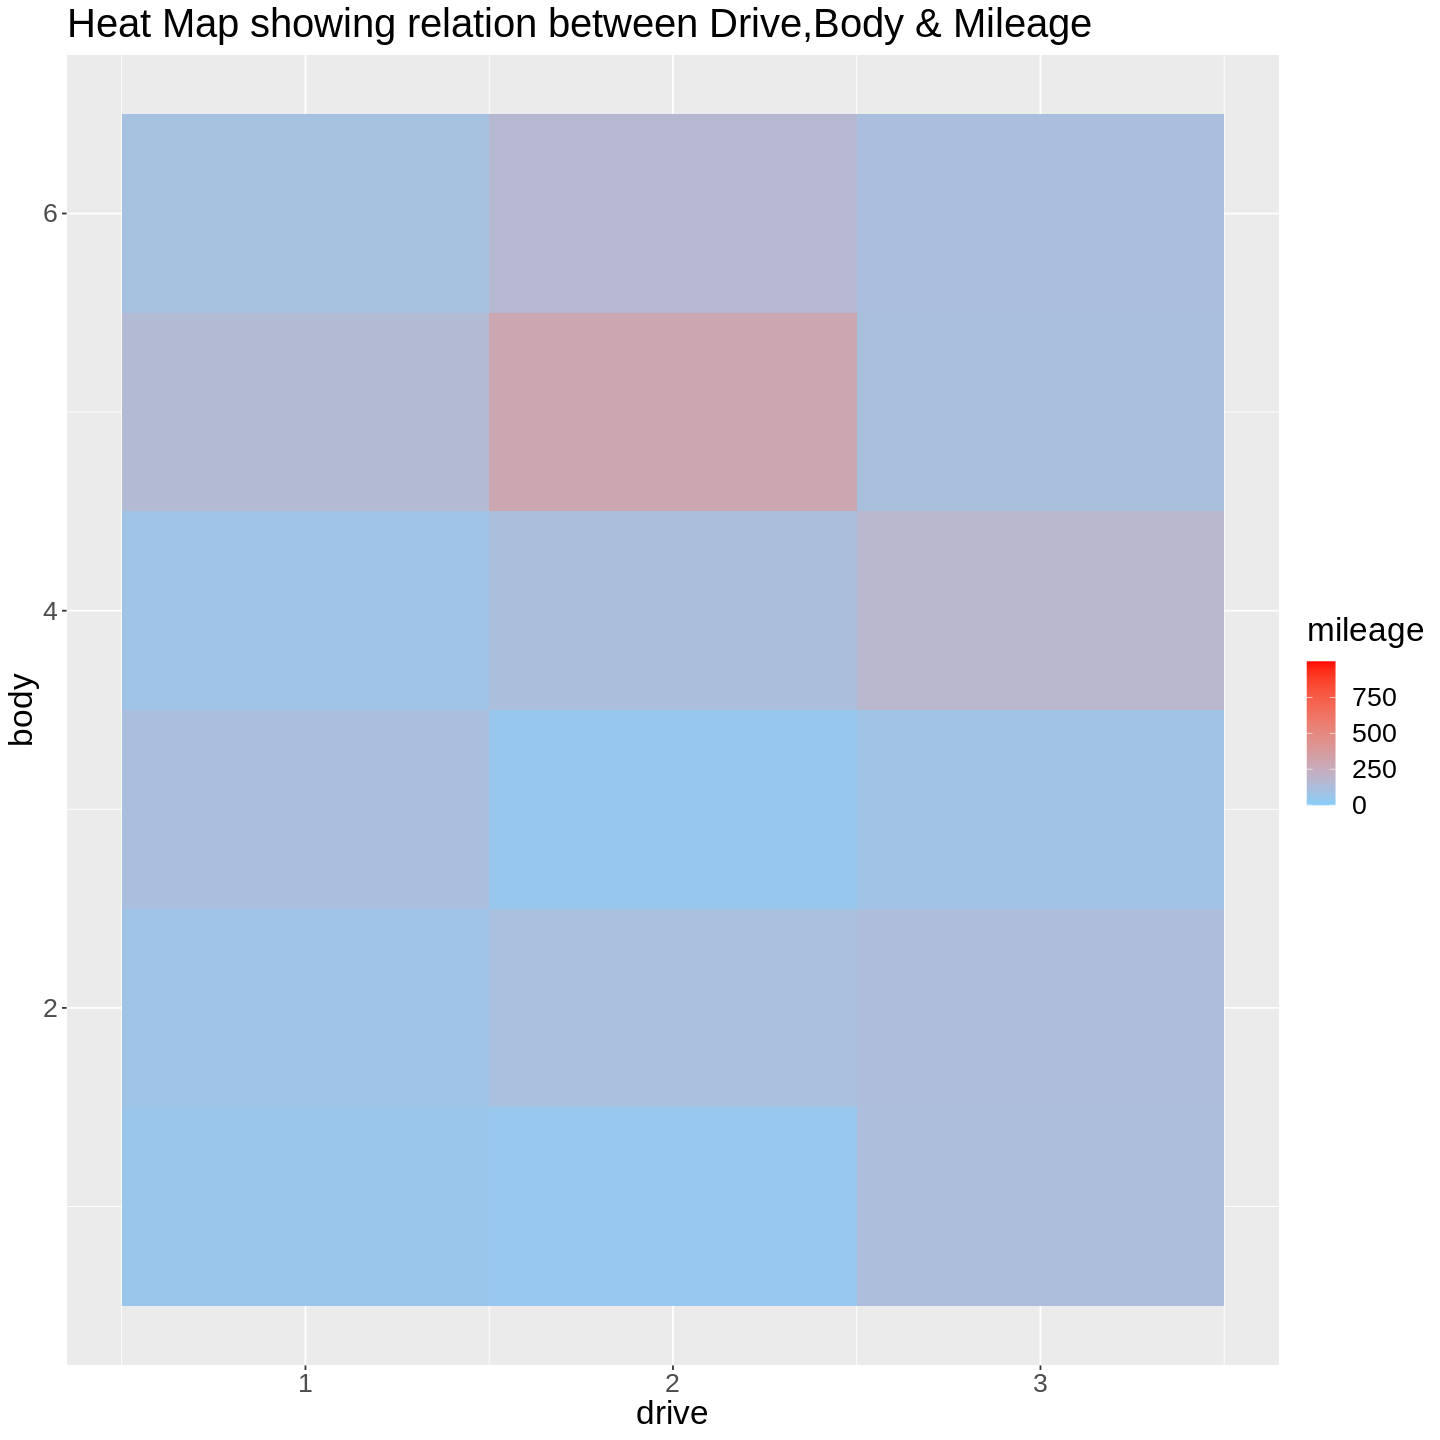

In [109]:
options(repr.plot.width=12, repr.plot.height=12)
# Heatmap 
ggplot(train, aes(drive, body, fill= mileage)) + 
geom_tile()+
theme(text = element_text(size = 20)) + 
ggtitle("Heat Map showing relation between Drive,Body & Mileage")+
scale_fill_gradient(low="lightskyblue", high="red") 

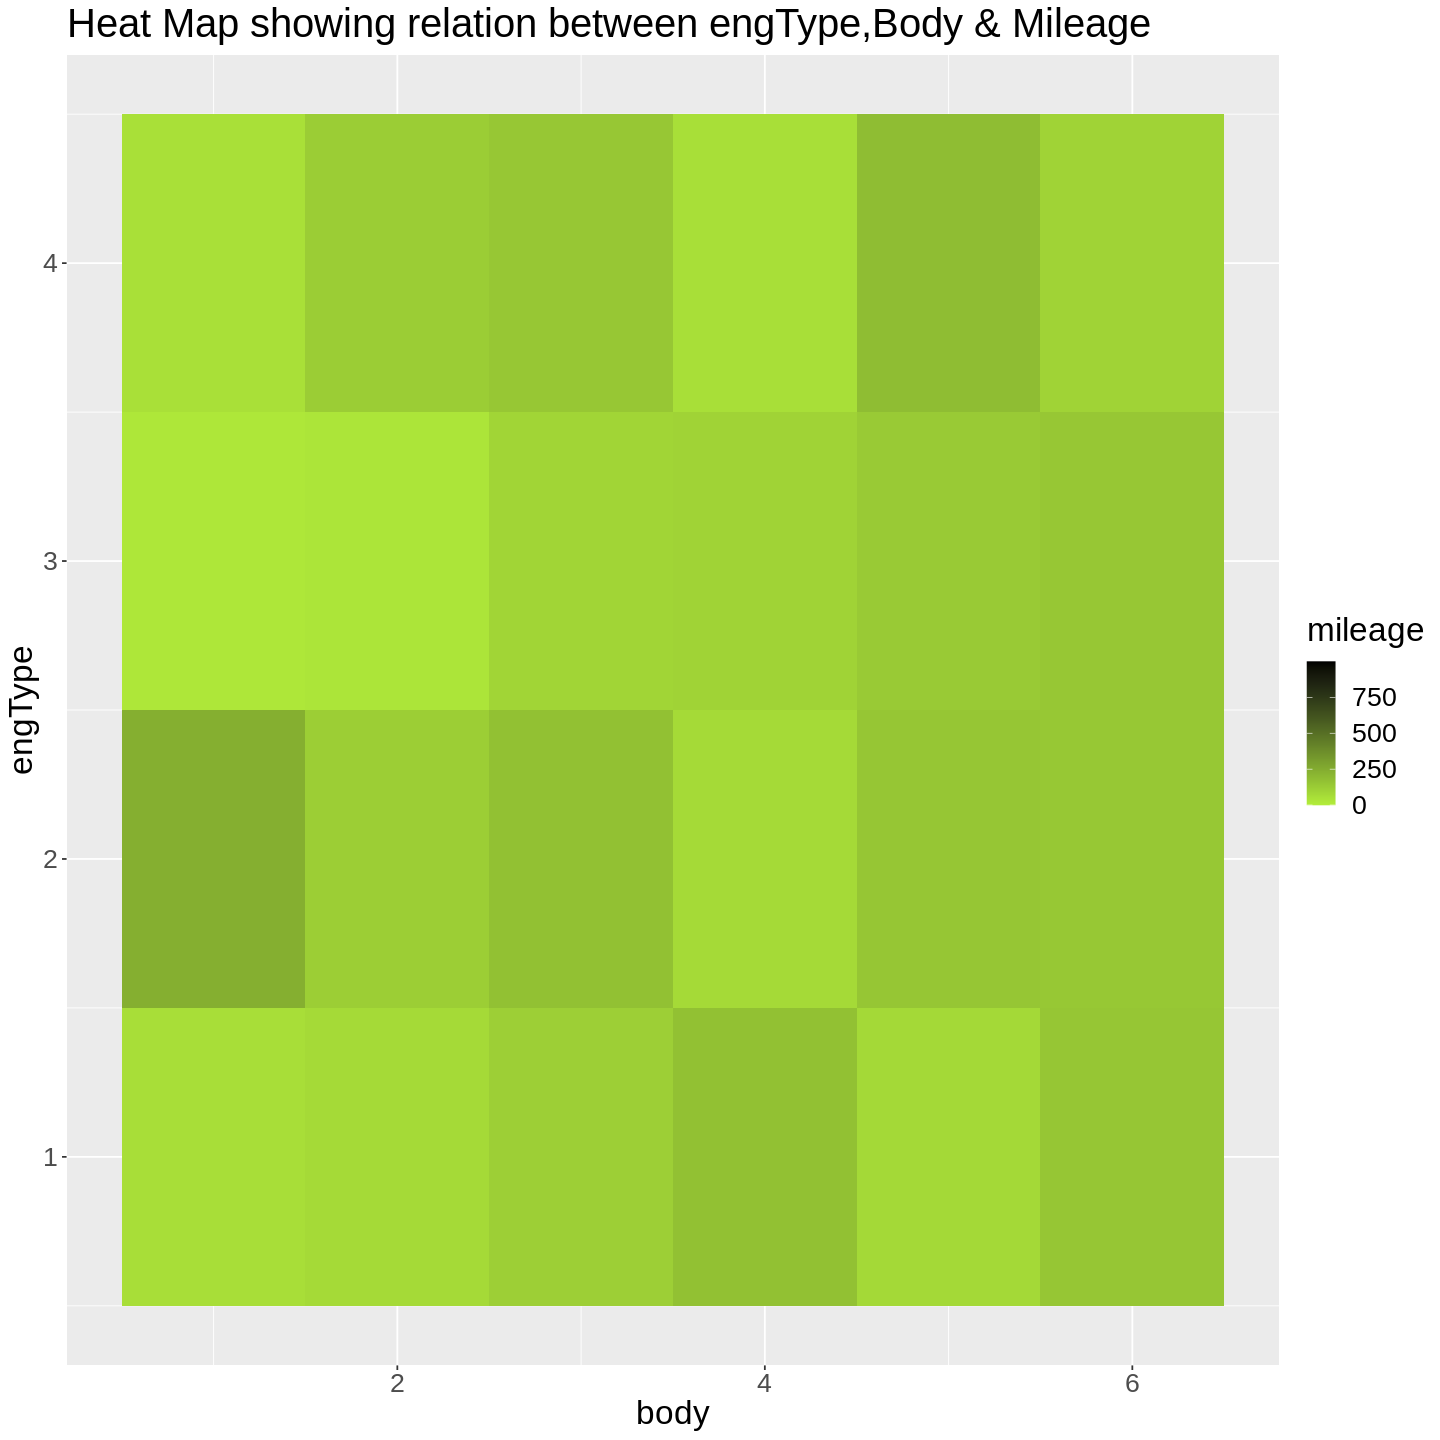

In [110]:
options(repr.plot.width=12, repr.plot.height=12)
# Heatmap 
ggplot(train, aes(body, engType, fill= mileage)) + 
theme(text = element_text(size = 20)) + 
geom_tile()+
ggtitle("Heat Map showing relation between engType,Body & Mileage")+
scale_fill_gradient(low="olivedrab2", high="black") 

#### **CONVERTING CATEGORICAL TO NUMERICAL DATA**

In [103]:
dataInfo <- function(train) {
  NAvalues <- list(); NAclass <- list(); UniqueVals <- list(); ColName <- names(train); Index <- c(1:dim(train)[2])
  for(i in 1:dim(train)[2]) {
    NAvalues[i] <- sum(is.na(train[,i]))
    NAclass[i] <- class(train[,i])
    if(class(train[,i])=="numeric" | class(train[,i])=="integer") {
      UniqueVals[i] <- 'Not Applicable'
    }
    else{
      UniqueVals[i] <- length(unique(train[,i]))
    }
  }
  NAlist <- cbind(Index,ColName,NAvalues,NAclass,UniqueVals) 
}

Info <- dataInfo(train); 
Info

Index ColName      NAvalues NAclass   UniqueVals    
 [1,] 1     car          0        character 85            
 [2,] 2     price        0        numeric   Not Applicable
 [3,] 3     body         0        character 6             
 [4,] 4     mileage      0        integer   Not Applicable
 [5,] 5     engV         0        numeric   Not Applicable
 [6,] 6     engType      0        character 4             
 [7,] 7     registration 0        character 2             
 [8,] 8     year         0        integer   Not Applicable
 [9,] 9     drive        0        character 4

In [104]:
# convert factor to numeric
train$drive <- as.numeric(factor(train$drive, 
                                  levels = c("front", "full", "rear", " "),
                                  labels = c(1,2,3,4) ,ordered = TRUE))
train$engType <- as.numeric(factor(train$engType, 
                                  levels = c("Petrol", "Diesel","Gas", "Other"),
                                  labels = c(1,2,3,4) ,ordered = TRUE))
train$registration <- as.numeric(factor(train$registration, 
                                  levels = c("N", "Y"),
                                  labels = c(0,1) ,ordered = TRUE))
train$body <- as.numeric(factor(train$body, 
                                  levels = c("crossover","hatch", "sedan", "vagon", "van","other"),
                                  labels = c(1,2,3,4,5,6) ,ordered = TRUE))

train

,car,price,body,mileage,engV,engType,registration,year,drive
,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,GAZ,259.350,3,1,2.400000,4,NA,1959,3
2,Moskvich-AZLK,280.000,3,99,1.500000,1,NA,1976,3
3,ZAZ,370.500,3,3,1.100000,1,NA,1989,3
4,Moskvich-AZLK,400.000,3,1,10.000000,1,NA,1985,3
5,ZAZ,400.000,3,20,2.629093,1,NA,1990,3
6,VAZ,400.000,3,10,1.100000,1,NA,1982,3
7,VAZ,460.000,3,1,2.629093,1,NA,1981,3
8,VAZ,463.125,3,10,1.300000,1,NA,1979,3
9,VAZ,463.125,3,68,1.200000,1,NA,1984,3


**END OF ASSIGNMENT**